In [1]:
from mp1 import generate_dataset_classification
from mp1 import generate_a_disk
from keras.models import Sequential
from keras.layers import Dense, Activation
from pandas import get_dummies

import matplotlib.pyplot as plt
import keras
import numpy as np

Using TensorFlow backend.


# Dataset Generation

In [2]:
[x_train, t_train] = generate_dataset_classification(300, 20)
t_train = get_dummies(t_train).values

x_test = generate_a_disk()
x_test = np.expand_dims(x_test, axis=0)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


# Classification with SGD

In [3]:
model_sgd = Sequential([
        Dense(3, input_dim=10000),
        Activation('softmax'),
    #Dense(1000, input_dim=10000),
    #Activation('relu'),
    #Dense(500),
    #Activation('relu'),
    #Dense(100),
    #Activation('relu'),
    #Dense(3),
    #Activation('softmax'),
])

sgd = keras.optimizers.SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
model_sgd.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print('Training ------------')
model_sgd.fit(x_train, t_train, epochs=20, batch_size=32)

Training ------------
Epoch 1/20
300/300 [==============================] - 3s 9ms/step - loss: 2.2323 - acc: 0.3933
Epoch 2/20
300/300 [==============================] - 0s 312us/step - loss: 1.0621 - acc: 0.6933
Epoch 3/20
300/300 [==============================] - 0s 376us/step - loss: 0.5500 - acc: 0.7467
Epoch 4/20
300/300 [==============================] - 0s 326us/step - loss: 0.2864 - acc: 0.8567
Epoch 5/20
300/300 [==============================] - 0s 322us/step - loss: 0.2953 - acc: 0.8867
Epoch 6/20
300/300 [==============================] - 0s 310us/step - loss: 0.2860 - acc: 0.8533
Epoch 7/20
300/300 [==============================] - 0s 359us/step - loss: 0.1591 - acc: 0.9600
Epoch 8/20
300/300 [==============================] - 0s 382us/step - loss: 0.1261 - acc: 0.9800
Epoch 9/20
300/300 [==============================] - 0s 342us/step - loss: 0.1317 - acc: 0.9633
Epoch 10/20
300/300 [==============================] - 0s 331us/step - loss: 0.1261 - acc: 0.9733
Epoch 11/

# Classification with Adam

In [4]:
model_adam = Sequential([
        Dense(3, input_dim=10000),
        Activation('softmax'),
    
    #Dense(1000, input_dim=10000),
    #Activation('relu'),
    #Dense(500),
    #Activation('relu'),
    #Dense(100),
    #Activation('relu'),
    #Dense(3),
    #Activation('softmax'),
])

adam = keras.optimizers.Adam(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model_adam.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print('Training ------------')
model_adam.fit(x_train, t_train, epochs=20, batch_size=32)

Training ------------
Epoch 1/20
300/300 [==============================] - 0s 1ms/step - loss: 3.0425 - acc: 0.3833
Epoch 2/20
300/300 [==============================] - 0s 319us/step - loss: 1.0318 - acc: 0.6233
Epoch 3/20
300/300 [==============================] - 0s 319us/step - loss: 0.6601 - acc: 0.7433
Epoch 4/20
300/300 [==============================] - 0s 296us/step - loss: 0.6871 - acc: 0.7567
Epoch 5/20
300/300 [==============================] - 0s 279us/step - loss: 0.5054 - acc: 0.7967
Epoch 6/20
300/300 [==============================] - 0s 316us/step - loss: 0.2876 - acc: 0.8733
Epoch 7/20
300/300 [==============================] - 0s 321us/step - loss: 0.1967 - acc: 0.9400
Epoch 8/20
300/300 [==============================] - 0s 306us/step - loss: 0.1532 - acc: 0.9433
Epoch 9/20
300/300 [==============================] - 0s 336us/step - loss: 0.1122 - acc: 0.9833
Epoch 10/20
300/300 [==============================] - 0s 315us/step - loss: 0.0905 - acc: 0.9867
Epoch 11/

# Test

In [5]:
print(model_sgd.predict(x_test))
print(model_adam.predict(x_test))

[[ 0.  1.  0.]]
[[ 0.  1.  0.]]


# Visualization: model trained by SGD

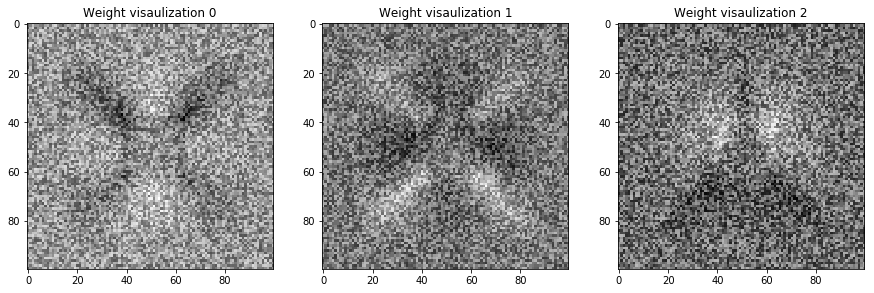

In [6]:
%matplotlib inline

weights = model_sgd.get_weights()[0]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for idx in range(3):
    ax[idx].imshow(np.reshape(weights[:, idx], (100, 100)), cmap='gray')
    ax[idx].set_title('Weight visaulization '+str(idx))
plt.show()

# Visualization: model trained by Adam

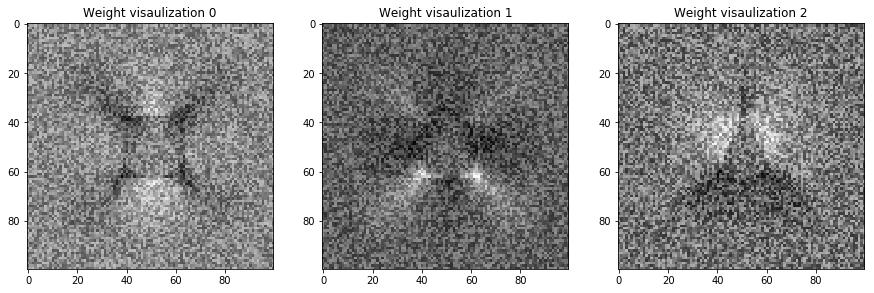

In [7]:
%matplotlib inline

weights = model_adam.get_weights()[0]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for idx in range(3):
    ax[idx].imshow(np.reshape(weights[:, idx], (100, 100)), cmap='gray')
    ax[idx].set_title('Weight visaulization '+str(idx))
plt.show()